ASSIGNMENT 3 BY VANEESA F

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [ ]:
batch_size = 16

# IMAGE AUGMENTATION

In [ ]:
data_aug = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> spliting dataset into training and test

In [ ]:
train_data, = tf.keras.utils.image_dataset_from_directory(
  "drive/MyDrive/flowers",
  validation_split=0.25,
  subset="training",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [ ]:
class_names = train_data.class_names

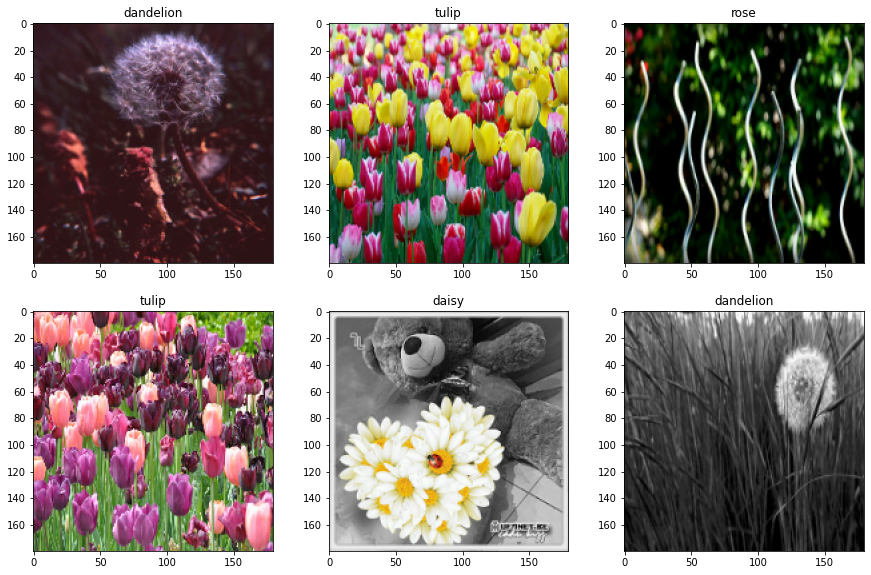

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

> Normalizing pixel value from 0 - 255 to 0 - 1

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
dataset_normalized = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


# MODEL CREATION AND ADDITION OF LAYERS


In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_aug,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  # adding convolutional layer
  layers.Conv2D(16, 3, activation='relu'),
  # adding maxpooling layer
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  # adding flatten
  layers.Flatten(),
  # adding dense hidden layer
  layers.Dense(128, activation='relu'),
  # adding dense output layer
  layers.Dense(num_classes)
])

# COMPLIATION OF MODEL

In [ ]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# FITTING THE MODEL

In [ ]:
epochs=15
history = model.fit(train_data,validation_data=val_data,epochs=epochs)

Epoch 1/15
203/203 [==============================] - 113s 554ms/step - loss: 1.2347 - accuracy: 0.4700 - val_loss: 1.0847 - val_accuracy: 0.5672
Epoch 2/15
203/203 [==============================] - 109s 537ms/step - loss: 0.9885 - accuracy: 0.6124 - val_loss: 1.0040 - val_accuracy: 0.5996
Epoch 3/15
203/203 [==============================] - 88s 432ms/step - loss: 0.8784 - accuracy: 0.6563 - val_loss: 1.0471 - val_accuracy: 0.6154
Epoch 4/15
203/203 [==============================] - 97s 479ms/step - loss: 0.8347 - accuracy: 0.6776 - val_loss: 0.8886 - val_accuracy: 0.6793
Epoch 5/15
203/203 [==============================] - 98s 482ms/step - loss: 0.7949 - accuracy: 0.6986 - val_loss: 0.9212 - val_accuracy: 0.6719
Epoch 6/15
203/203 [==============================] - 92s 454ms/step - loss: 0.7518 - accuracy: 0.7171 - val_loss: 0.8591 - val_accuracy: 0.6821
Epoch 7/15
203/203 [==============================] - 82s 402ms/step - loss: 0.7336 - accuracy: 0.7273 - val_loss: 1.0130 - val_

# SAVING THE MODEL

In [ ]:
model.save("flowers.h5")

In [ ]:
model.load_weights('drive/MyDrive/flowers.h5')

# TESTING THE MODEL

In [ ]:
sunflower_url = "https://img.freepik.com/premium-vector/red-rose-with-green-leaf_43623-944.jpg?w=2000"
sunflower_path = tf.keras.utils.get_file('Rose', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)],100 * np.max(score))

180224/167698 [================================] - 0s 0us/step
rose 94.11047697067261
